In [33]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('logs/tmp_exp/version_0/metrics.csv')

# Display the first few rows of the DataFrame to verify the data
print(df.head())


   lr-AdamW  step  val_loss  val_cc   val_acc  epoch  train_loss  train_cc  \
0     0.001     0       NaN     NaN       NaN    NaN         NaN       NaN   
1       NaN  3749  0.114299     0.0  0.142200    0.0         NaN       NaN   
2       NaN  3749       NaN     NaN       NaN    0.0    0.191512       0.0   
3     0.001  3750       NaN     NaN       NaN    NaN         NaN       NaN   
4       NaN  7499  0.075082     0.0  0.144056    1.0         NaN       NaN   

   train_acc  
0        NaN  
1        NaN  
2   0.135674  
3        NaN  
4        NaN  


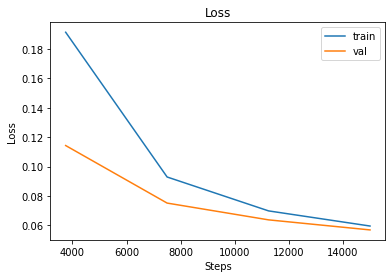

In [34]:
import matplotlib.pyplot as plt

# Assuming your DataFrame has columns 'X' and 'Y'
val_df = df[['step', 'val_loss']].dropna()
x_val = val_df['step']
y_val = val_df['val_loss']

train_df = df[['step', 'train_loss']].dropna()
x_train = train_df['step']
y_train = train_df['train_loss']


# Create a line plot
plt.plot(x_train, y_train, label="train")
plt.plot(x_val, y_val, label="val")

# Set plot labels and title
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Loss')


plt.legend()

# Show the plot
plt.show()


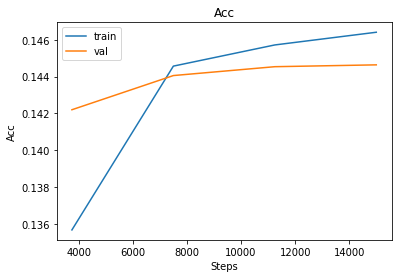

In [35]:
import matplotlib.pyplot as plt

# Assuming your DataFrame has columns 'X' and 'Y'
val_df = df[['step', 'val_acc']].dropna()
x_val = val_df['step']
y_val = val_df['val_acc']

train_df = df[['step', 'train_acc']].dropna()
x_train = train_df['step']
y_train = train_df['train_acc']


# Create a line plot
plt.plot(x_train, y_train, label="train")
plt.plot(x_val, y_val, label="val")

# Set plot labels and title
plt.xlabel('Steps')
plt.ylabel('Acc')
plt.title('Acc')


plt.legend()

# Show the plot
plt.show()


In [24]:
val_df

,step,val_loss
1,3749,0.114299
4,7499,0.075082
7,11249,0.063646


In [7]:
list(set(df['step']))

[0, 3749]

In [8]:
df['val_loss'].dropna()

1    0.114299
Name: val_loss, dtype: float64